In [1]:
import os,shutil
original_data_dir=r'F:\work\pywork\ipython\keras_data\dog&cat\train'
base_dir=r'F:\work\pywork\ipython\keras_data\dog&cat_small'

if os.path.isdir(base_dir):
    shutil.rmtree(base_dir)

os.makedirs(base_dir)

train_dir=os.path.join(base_dir,'train')
os.makedirs(train_dir)
val_dir=os.path.join(base_dir,'val')
os.makedirs(val_dir)
test_dir=os.path.join(base_dir,'test')
os.makedirs(test_dir)

train_cat_dir=os.path.join(train_dir,'cats')
os.makedirs(train_cat_dir)
train_dog_dir=os.path.join(train_dir,'dogs')
os.makedirs(train_dog_dir)

val_cat_dir=os.path.join(val_dir,'cats')
os.makedirs(val_cat_dir)
val_dog_dir=os.path.join(val_dir,'dogs')
os.makedirs(val_dog_dir)

test_cat_dir=os.path.join(test_dir,'cats')
os.makedirs(test_cat_dir)
test_dog_dir=os.path.join(test_dir,'dogs')
os.makedirs(test_dog_dir)

In [2]:

def copyfile(destination_path,fnames,original_data_dir=original_data_dir):
    for fname in fnames:
        src=os.path.join(original_data_dir,fname)
        dst=os.path.join(destination_path,fname)
        shutil.copyfile(src,dst)

In [3]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
copyfile(train_cat_dir,fnames)

In [4]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
copyfile(val_cat_dir,fnames)
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
copyfile(test_cat_dir,fnames)

In [5]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
copyfile(train_dog_dir,fnames)
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
copyfile(val_dog_dir,fnames)
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
copyfile(test_dog_dir,fnames)

In [6]:
len(os.listdir(train_cat_dir))

1000

In [7]:
from keras import models,layers
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
from keras import optimizers,losses

model.compile(loss=losses.binary_crossentropy,
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255) 
test_datagen=ImageDataGenerator(rescale=1./255)
train_genertor=train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary')
val_genertor=test_datagen.flow_from_directory(
                val_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
i=0
for data,label in train_genertor:
    print(data.shape,label.shape)
    break

(20, 150, 150, 3) (20,)


In [13]:
history=model.fit_generator(
    train_genertor,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_genertor,
    validation_steps=50)
model.save(r'model/cat_and_dog_small_1.h5')

Epoch 1/30
100/100 [==============================] - 70s 702ms/step - loss: 0.6914 - acc: 0.5300 - val_loss: 0.6782 - val_acc: 0.5530
Epoch 2/30
100/100 [==============================] - 38s 383ms/step - loss: 0.6643 - acc: 0.6020 - val_loss: 0.6700 - val_acc: 0.5540
Epoch 3/30
100/100 [==============================] - 27s 273ms/step - loss: 0.6142 - acc: 0.6690 - val_loss: 0.6531 - val_acc: 0.6210
Epoch 4/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5773 - acc: 0.7025 - val_loss: 0.6279 - val_acc: 0.6330
Epoch 5/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5339 - acc: 0.7285 - val_loss: 0.5899 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5130 - acc: 0.7375 - val_loss: 0.5831 - val_acc: 0.6890
Epoch 7/30
100/100 [==============================] - 9s 86ms/step - loss: 0.4861 - acc: 0.7595 - val_loss: 0.5641 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 9s 86ms/s

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
def plt_loss_acc(history):
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    loss=history.history['loss']
    val_loss=history.history['val_loss']



    epochs=range(1,len(acc)+1)
    plt.plot(epochs,acc,'bo',label='train_acc')
    plt.plot(epochs,val_acc,'b--',label='val_acc')

    plt.legend()
    plt.figure()
    plt.plot(epochs,loss,'go',label='train_loss')
    plt.plot(epochs,val_loss,'g--',label='val_loss')
    plt.legend()

In [26]:
from keras import models,layers,optimizers,losses
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


model.compile(loss=losses.binary_crossentropy,
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [33]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_genertor=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')
val_genertor=test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')
history=model.fit_generator(
    train_genertor,
    epochs=100,
    steps_per_epoch=100,
    validation_data=val_genertor,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 18s 182ms/step - loss: 0.6651 - acc: 0.5859 - val_loss: 0.6806 - val_acc: 0.5393
Epoch 2/100
100/100 [==============================] - 16s 163ms/step - loss: 0.6575 - acc: 0.5956 - val_loss: 0.6390 - val_acc: 0.6160
Epoch 3/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6356 - acc: 0.6450 - val_loss: 0.6103 - val_acc: 0.6548
Epoch 4/100
100/100 [==============================] - 16s 165ms/step - loss: 0.6180 - acc: 0.6528 - val_loss: 0.6226 - val_acc: 0.6385
Epoch 5/100
100/100 [==============================] - 16s 163ms/step - loss: 0.6080 - acc: 0.6669 - val_loss: 0.5682 - val_acc: 0.6891
Epoch 6/100
100/100 [==============================] - 16s 162ms/step - loss: 0.5992 - acc: 0.6750 - val_loss: 0.5816 - val_acc: 0.6862
Epoch 7/100
100/100 [==============================] - 17s 165ms/step - loss: 0.5892 - acc: 0.6781 -

100/100 [==============================] - 16s 160ms/step - loss: 0.4259 - acc: 0.8025 - val_loss: 0.4604 - val_acc: 0.8033
Epoch 61/100
100/100 [==============================] - 16s 161ms/step - loss: 0.4186 - acc: 0.8103 - val_loss: 0.4307 - val_acc: 0.7919
Epoch 62/100
100/100 [==============================] - 16s 162ms/step - loss: 0.4185 - acc: 0.8100 - val_loss: 0.5830 - val_acc: 0.7221
Epoch 63/100
100/100 [==============================] - 16s 162ms/step - loss: 0.4087 - acc: 0.8088 - val_loss: 0.4119 - val_acc: 0.8015
Epoch 64/100
100/100 [==============================] - 16s 163ms/step - loss: 0.4060 - acc: 0.8159 - val_loss: 0.4619 - val_acc: 0.8022
Epoch 65/100
100/100 [==============================] - 16s 162ms/step - loss: 0.4125 - acc: 0.8059 - val_loss: 0.4380 - val_acc: 0.8033
Epoch 66/100
100/100 [==============================] - 16s 164ms/step - loss: 0.3990 - acc: 0.8203 - val_loss: 0.4176 - val_acc: 0.8228
Epoch 67/100
100/100 [==============================] 

In [34]:
model.save(r'model\cats_and_dogs_small_2.h5')

In [35]:
from keras.applications import VGG16
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3))
conv_base.summary()

58892288/58889256 [==============================] - 62s 1us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_poo

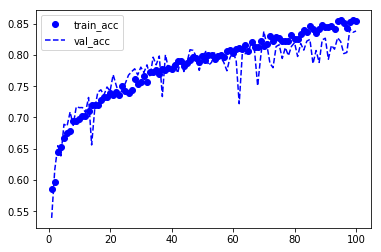

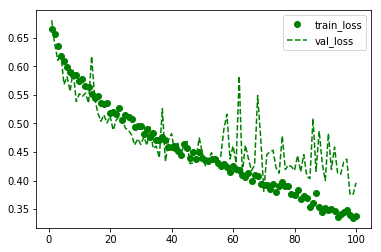

In [37]:
plt_loss_acc(history)

In [51]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(
        directory,
        batch_size=batch_size,
        target_size=(150,150),
        class_mode='binary')
    i=0
    for input_batch,label_batch in generator:
        feature_batch=conv_base.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size]=feature_batch
        labels[i*batch_size:(i+1)*batch_size]=label_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return features,labels

In [57]:
train_feature,train_labels=extract_features(train_dir,2000)
val_feature,val_labels=extract_features(val_dir,1000)
test_feature,test_labels=extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [58]:
train_feature=np.reshape(train_feature,(2000,4*4*512))
val_feature=np.reshape(val_feature,(1000,4*4*512))
test_feature=np.reshape(test_feature,(1000,4*4*512))

In [60]:
model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])
history=model.fit(
    train_feature,train_labels,
    epochs=30,batch_size=20,
    validation_data=(val_feature,val_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 694us/step - loss: 0.5854 - acc: 0.6870 - val_loss: 0.4294 - val_acc: 0.8440
Epoch 2/30
2000/2000 [==============================] - 1s 485us/step - loss: 0.4194 - acc: 0.8155 - val_loss: 0.3532 - val_acc: 0.8650
Epoch 3/30
2000/2000 [==============================] - 1s 483us/step - loss: 0.3578 - acc: 0.8510 - val_loss: 0.3129 - val_acc: 0.8790
Epoch 4/30
2000/2000 [==============================] - 1s 480us/step - loss: 0.3117 - acc: 0.8715 - val_loss: 0.2998 - val_acc: 0.8820
Epoch 5/30
2000/2000 [==============================] - 1s 485us/step - loss: 0.2804 - acc: 0.8870 - val_loss: 0.2824 - val_acc: 0.8940
Epoch 6/30
2000/2000 [==============================] - 1s 493us/step - loss: 0.2611 - acc: 0.9040 - val_loss: 0.2642 - val_acc: 0.8980
Epoch 7/30
2000/2000 [==============================] - 1s 488us/step - loss: 0.2454 - acc: 0.9050 - val_loss: 0.2635 - val_acc: 0.8960


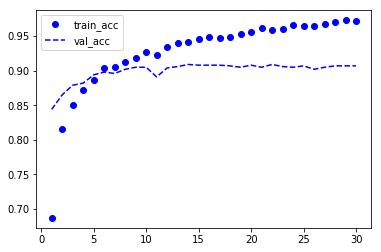

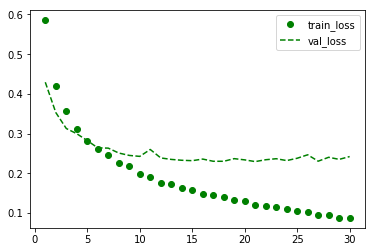

In [61]:
plt_loss_acc(history)

In [81]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [82]:
len(model.trainable_weights)

4

In [92]:
conv_base.trainable=False

In [93]:
len(model.trainable_weights)

4

In [85]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers,losses

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

val_generator=test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss=losses.binary_crossentropy,
             metrics=['acc'])


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=val_generator,
        validation_steps=50)

Epoch 1/30


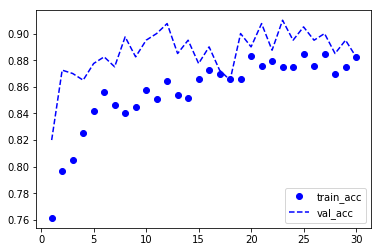

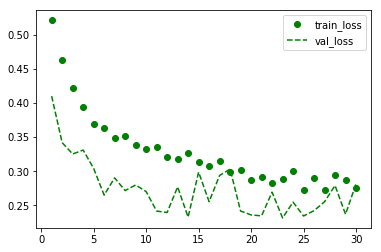

In [98]:
plt_loss_acc(history)

In [99]:
model.save('model/cats_and_dogs_small.h5')

In [101]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

test_loss,test_acc=model.evaluate_generator(
    test_generator,steps=50)
print(test_acc,test_loss)

Found 1000 images belonging to 2 classes.
0.8949999988079071 0.24809261925518514


In [103]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False
len(model.trainable_weights)        

10

In [104]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
             loss=losses.binary_crossentropy,
             metrics=['acc'])

In [107]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=val_generator,
        validation_steps=20)

Epoch 1/30


ResourceExhaustedError: OOM when allocating tensor with shape[20,64,150,150] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node vgg16_1/block1_conv2/convolution}} = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](vgg16_1/block1_conv1/Relu, block1_conv2/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node metrics_14/acc/Mean_1/_1221}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_768_metrics_14/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
